# Working with Jupyter Notebooks
In this notebook we are going to work with Jupyter Notebooks. We will:
1. Load different TF databases.
2. Do some simple word-based queries.
3. Export query results to TSV files.
4. Analysing our query results with `pandas`.
5. Explore simple graphing methods for visualizing our query results.

# Starting a Jupyter Notebook
There are different ways to open notebooks within jupyter:
1. You can either open the terminal/prompt and type

>```jupyter notebook```


    This will open the the jupyter environment and a new notebook in your default webbrowser.
2. Or you open the Anaconda Navigator and click on *Launch* in the juypter notebook box:

    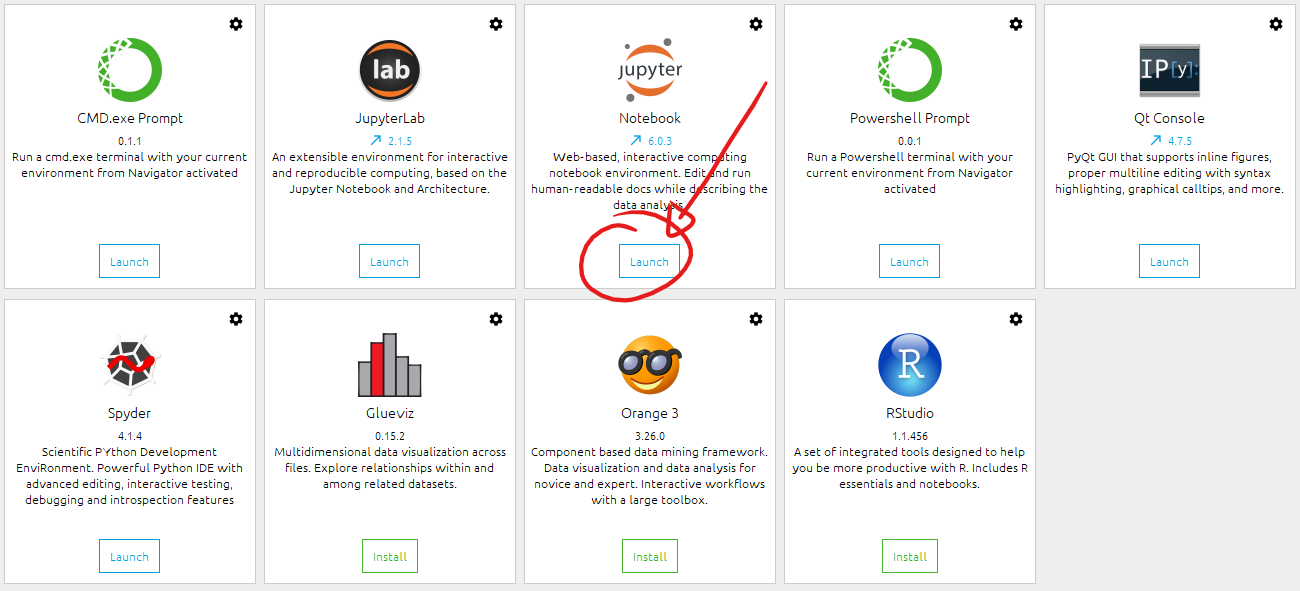

Alternatively you can choose to work with notebooks within the `jupyter lab` environment. This can be started on the console/terminal/prompt with the command

>```jupyter lab```

`Jupyter Lab` can also be launched via the Anaconda Navigator.

If you have a dedicated folder within which you want to work. You should first `cd` into that folder in your terminal and then launch the jupyter command. In my case this looks likes this:
>```cd D:\OneDrive\1200_Research\Fabric-Text```

>```jupyter lab```

Once you have executed the command or clicked the launch button the jupyter environment will open in your webbrowser. Open a new notebook and copy/paste the code cells from this notebook into your own notebook or download this notebook to your machine and open it as a jupyter notebook.

## Getting the TF workbench ready
The first thing we need to do in our jupyter notebook is to
1. load the TF program
2. load the TF database

In [1]:
# First we load the TF program
from tf.fabric import Fabric
from tf.app import use

In [2]:
# Now we load the TF bhsa database
BHS = use('bhsa', hoist=globals())

   |     1.63s T dict_bol_EN          from ~/text-fabric-data/etcbc/bhsa/tf/c
   |     1.41s T dict_bol_HebArm      from ~/text-fabric-data/etcbc/bhsa/tf/c
   |     1.00s T dict_bol_abc         from ~/text-fabric-data/etcbc/bhsa/tf/c
   |     0.60s T vc_bol               from ~/text-fabric-data/etcbc/bhsa/tf/c


In [3]:
# Now we load the TF tisch database
NT = use('tisch', hoist=globals())

We have now both the BHS as well as the NT Tischendorf text loaded and are ready to do some simple querying.

# Some simple word based queries...

## Lemma Searches
Lets search in the BHS the word Abram (>BRM/) and Abraham (>BRHM/) by typing

```word lex=>BRHM/|>BRM/```

The `|` stands for the AND-OR. Thus, we are searching for Abraham **and/or** Abram.

The feature **lex** of the object type **word** allows us to write Hebrew words in transliteration. In the next workshops we will get to know many more features and get introduced into the database.

In [4]:
# Searching for "Abram" and "Abraham" in the OT
BHSAbrahamSearch = '''
word lex=>BRHM/|>BRM/ 
'''
BHSAbrahamSearch  = BHS.search(BHSAbrahamSearch)
BHS.table(BHSAbrahamSearch, start=1, end=10, condensed=True)

  0.39s 236 results


While Abraham and/or Abram appear 236 times in the OT we want to know how often Abraham appears in the NT?

In [5]:
# Searching for "Abraham" in the NT
NTAbrahamSearch = '''
word anlex_lem=Ἀβραάμ
'''
NTAbrahamSearch  = NT.search(NTAbrahamSearch)
NT.show(NTAbrahamSearch, start=1, end=2, condensed=False)

  0.14s 73 results


Abraham appears a total of 73x in the NT. If you want to search lemmas without havng to type Greek script (and thus switching your keyboard), make sure that you watch this video: https://youtu.be/9V1zRampYjc . All the additional tf files are to be found here: https://github.com/oliverglanz/Tischendorf-Morphology-tf-.

Assuming that you have watched the video and imported the additional tf files into your TF folder. You can now write the same Abraham search in transliteration by using the feature `lex_og`:

In [6]:
# Searching for "Abraham" in the NT with transliteration
NTAbrahamSearchLex = '''
word lex_og=Abraam anlex_lem*
'''
NTAbrahamSearchLex  = NT.search(NTAbrahamSearchLex)
NT.show(NTAbrahamSearchLex, start=1, end=2, condensed=False)

  0.25s 73 results


Another example in which we search for  "θεός", " Ἰησοῦς", the personal pronoun "ἐγώ", and the verb "εἰμί" appearing within one verse within the Tischendorf corpus. Instead of using the Greek script, this query uses its Latin transliteration.

In [7]:
translit = '''
verse
    word lex_og=Iesous
    word lex_og=theos
    word lex_og=eimi
    word lex_og=ego
'''
translit  = NT.search(translit)
NT.table(translit, start=1, end=7, extraFeatures={'anlex_lem'}, condensed=True)

  0.50s 72 results


## Morphology Searches
Lets search for 1sg Futurum-I of εἰμί.

In [8]:
eimi = '''
word ps=p1 nu=sg vt=future-I lex_og=eimi
'''
eimi  = NT.search(eimi)
NT.show(eimi, start=1, end=2, condensed=True, extraFeatures={'anlex_lem', 'gloss'})

  0.14s 13 results


Lets look up a variety of morphological features in John 1:1:

In [9]:
# Searching for "Abraham" in the NT
ShowMorph = '''
book book=John
 chapter chapter=1
  verse verse=1
   word case* gn* mood* nountype* nu* ps* sp* voice* vt* anlex_lem*
'''
ShowMorph  = NT.search(ShowMorph)
NT.show(ShowMorph, start=1, end=7, condensed=True)

  1.25s 17 results


## Word-Frequency Searches
Let us see how often each word in Matthew 1:1-2 appears in the entire NT. For this we use in the `show` function the `extraFeatures` option. We want to show both the Greek lexemes (**anlex_lem**) as well as the frequecy of distribution (**freq_lex_og**) by writing:
```python
extraFeatures={'anlex_lem', 'freq_lex_og'}
```

In [10]:
# Checking Frequency Counts
freqcount = '''
book book=Matthew
    chapter chapter=1
        verse verse=1|2
            word
'''
freqcount  = NT.search(freqcount)
NT.show(freqcount, start=1, end=1, extraFeatures={'anlex_lem', 'freq_lex_og'}, condensed=True)

  0.12s 26 results


Do you see the difference between `condensed=False` and `condensed=True`?

Imagine your Greek class know all the Greek vocab down to a frequency of 10. Next week you want to translate with them John 3. Thus, they have to prepare by learning all words that appear with a frequency of <10. You want to create a vocab list for them. We have to start with identifying the words first by using the feature `freq_lex_new`:

In [13]:
# Searching for all words that appear leass than 10 times in John 3
NTfreq = '''
book book=John
    chapter chapter=3
        word freq_lex_new<10 gloss* anlex_lem* lex_og*

'''
NTfreq  = NT.search(NTfreq)
NT.table(NTfreq, start=1, end=15, extraFeatures={'anlex_lem','freq_lex', 'freq_lex_og', 'freq_lex_new', 'gloss'}, condensed=False)

 0 
 1 book book=John
 2     chapter chapter=3
 3         word freq_lex_new<10 gloss* anlex_lem* lex_og*
 4 
 5 
Missing feature "freq_lex_new" in line(s) 3


  0.03s Cannot load feature "freq_lex_new": not in dataset
  0.03s 0 results
  0.03s Cannot load feature "freq_lex_new": not in dataset
  0.04s Cannot load feature "freq_lex_new": not in dataset


There is a total of 15 words in John 3 that appear less frequent than 10x. In order to produce a Vocab List we have to export our search results. How to do this, we will learn in one of our next notebooks... ;-)

# Query-result export for Data Mining
We have to export our query results into TSV files to that we can do some further data analysis. The fille paths will have to be written differently, depending on whether you are working in a Windows or MacOS environment. 

In a **Windows** environment your patch would look something like this:
```python
D:/OneDrive/1200_AUS-research/Fabric-TEXT
```

A TF export command could look like this:
```python
BHS.export(BHSAbrahamSearch, toDir='D:/OneDrive/1200_AUS-research/Fabric-TEXT', toFile='BHSAbrahamSearch.tsv')
```

In a **MacOS** environment your path would look something like this:
```python
/Users/glanz/OneDrive/1200_AUS-research/Fabric-TEXT
```

A TF export command could look like this:
```python
BHS.export(BHSAbrahamSearch, toDir='/Users/glanz/OneDrive/1200_AUS-research/Fabric-TEXT', toFile='BHSAbrahamSearch.tsv')
```

## Data Mining
### Query Export
Lets export our query results of our Abraham queries for both OT and NT:

In [7]:
#Command for Windows environment:
BHS.export(BHSAbrahamSearch, toDir='/Users/JOTA/Dropbox/TextFabric', toFile='BHSAbrahamSearch.tsv')

In [14]:
#Command for MacOS environment:
#BHS.export(BHSAbrahamSearch, toDir='/Users/JOTA/Dropbox/TextFabric', toFile='BHSAbrahamSearch.tsv')

In [38]:
#Command for Windows environment:
NT.export(NTAbrahamSearchLex, toDir='D:/OneDrive/1200_AUS-research/Fabric-TEXT', toFile='NTAbrahamSearchLex.tsv')

In [15]:
#Command for MacOS environment:
NT.export(NTAbrahamSearch, toDir='/Users/JOTA/Dropbox/TextFabric', toFile='NTAbrahamSearch.tsv')

    16s Cannot load feature "freq_lex_new": not in dataset


### Loading Data Analysis Tools
Lets now read the TSV files and do some further analysis of them. To enable data analysis functions we need to load some further python modules:

In [17]:
import sys, os, collections
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt; plt.rcdefaults()
from matplotlib.pyplot import figure
from collections import Counter

### Creating Dataframe of exported Query Results

Now we can load our TSV files as pandas dataframes

In [18]:
#Command for Windows environment:

BHSAbrahamSearch=pd.read_csv('/Users/JOTA/Dropbox/TextFabric/BHSAbrahamSearch.tsv',delimiter='\t',encoding='utf-16')
pd.set_option('display.max_columns', 50)
BHSAbrahamSearch.head()

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,lex1
0,1,Genesis,11,26,5366,word,אַבְרָ֔ם,>BRM/
1,2,Genesis,11,27,5379,word,אַבְרָ֔ם,>BRM/
2,3,Genesis,11,29,5405,word,אַבְרָ֧ם,>BRM/
3,4,Genesis,11,29,5412,word,אַבְרָם֙,>BRM/
4,5,Genesis,11,31,5437,word,אַבְרָ֣ם,>BRM/


In [35]:
#Command for MacOS environment:

#BHSAbrahamSearch=pd.read_csv('/Users/glanz/OneDrive/1200_AUS-research/Fabric-TEXT/BHSAbrahamSearch.tsv',delimiter='\t',encoding='utf-16')
#pd.set_option('display.max_columns', 50)
#BHSAbrahamSearch.head()

# Some simple data mining operations
## `groupby` particular *column* by `sum` and  `count`

In [19]:
BHSAbrahamSearch.groupby(["lex1"]).sum()

,R,S2,S3,NODE1
lex1,,,,
>BRHM/,25742,4209,2704,10028097
>BRM/,2224,829,684,1155649


In [20]:
BHSAbrahamSearch.groupby(["lex1"]).count()

,R,S1,S2,S3,NODE1,TYPE1,TEXT1
lex1,,,,,,,
>BRHM/,175,175,175,175,175,175,175
>BRM/,61,61,61,61,61,61,61


In [21]:
BHSAbrahamSearch.groupby(["lex1"]).count().sum()

R        236
S1       236
S2       236
S3       236
NODE1    236
TYPE1    236
TEXT1    236
dtype: int64

In [23]:
BHSAbrahamSearch.groupby(["S1"]).count()

,R,S2,S3,NODE1,TYPE1,TEXT1,lex1
S1,,,,,,,
1_Chronicles,7,7,7,7,7,7,7
1_Kings,1,1,1,1,1,1,1
2_Chronicles,2,2,2,2,2,2,2
2_Kings,1,1,1,1,1,1,1
Deuteronomy,7,7,7,7,7,7,7
Exodus,9,9,9,9,9,9,9
Ezekiel,1,1,1,1,1,1,1
Genesis,192,192,192,192,192,192,192
Isaiah,4,4,4,4,4,4,4


## `groupby` particular *column* by `count` and `sort_values`

In [25]:
BHSAbrahamSearch.groupby(['S1']).count().sort_values(['lex1'], ascending=False)

,R,S2,S3,NODE1,TYPE1,TEXT1,lex1
S1,,,,,,,
Genesis,192,192,192,192,192,192,192
Exodus,9,9,9,9,9,9,9
1_Chronicles,7,7,7,7,7,7,7
Deuteronomy,7,7,7,7,7,7,7
Isaiah,4,4,4,4,4,4,4
Psalms,4,4,4,4,4,4,4
2_Chronicles,2,2,2,2,2,2,2
Joshua,2,2,2,2,2,2,2
Nehemiah,2,2,2,2,2,2,2


## Finding a value with `==`

In [14]:
BHSAbrahamSearch[(BHSAbrahamSearch['lex1'] == '>BRM/')]

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,lex1
0,1,Genesis,11,26,5366,word,אַבְרָ֔ם,>BRM/
1,2,Genesis,11,27,5379,word,אַבְרָ֔ם,>BRM/
2,3,Genesis,11,29,5405,word,אַבְרָ֧ם,>BRM/
3,4,Genesis,11,29,5412,word,אַבְרָם֙,>BRM/
4,5,Genesis,11,31,5437,word,אַבְרָ֣ם,>BRM/
...,...,...,...,...,...,...,...,...
56,57,Genesis,17,1,7337,word,אַבְרָ֗ם,>BRM/
57,58,Genesis,17,3,7364,word,אַבְרָ֖ם,>BRM/
58,59,Genesis,17,5,7389,word,אַבְרָ֑ם,>BRM/
225,226,Nehemiah,9,7,387894,word,אַבְרָ֔ם,>BRM/


## Finding a value with `!=`

In [15]:
BHSAbrahamSearch[(BHSAbrahamSearch['lex1'] != '>BRM/')]

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,lex1
59,60,Genesis,17,5,7393,word,אַבְרָהָ֔ם,>BRHM/
60,61,Genesis,17,9,7464,word,אַבְרָהָ֔ם,>BRHM/
61,62,Genesis,17,15,7567,word,אַבְרָהָ֔ם,>BRHM/
62,63,Genesis,17,17,7599,word,אַבְרָהָ֛ם,>BRHM/
63,64,Genesis,17,18,7624,word,אַבְרָהָ֖ם,>BRHM/
...,...,...,...,...,...,...,...,...
231,232,1_Chronicles,1,34,391594,word,אַבְרָהָ֖ם,>BRHM/
232,233,1_Chronicles,16,16,399828,word,אַבְרָהָ֔ם,>BRHM/
233,234,1_Chronicles,29,18,406526,word,אַבְרָהָ֞ם,>BRHM/
234,235,2_Chronicles,20,7,416124,word,אַבְרָהָ֥ם,>BRHM/


# Finding values with `&` 

In [16]:
BHSAbrahamSearch[
          (BHSAbrahamSearch['lex1'] == '>BRM/')
        & (BHSAbrahamSearch['S1'] != 'Genesis')
                ]

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,lex1
225,226,Nehemiah,9,7,387894,word,אַבְרָ֔ם,>BRM/
227,228,1_Chronicles,1,27,391518,word,אַבְרָ֖ם,>BRM/


In [18]:
BHSAbrahamSearch[
          (BHSAbrahamSearch['lex1'] == '>BRM/')
        & (BHSAbrahamSearch['S2'] < 20 )
                ]

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,lex1
0,1,Genesis,11,26,5366,word,אַבְרָ֔ם,>BRM/
1,2,Genesis,11,27,5379,word,אַבְרָ֔ם,>BRM/
2,3,Genesis,11,29,5405,word,אַבְרָ֧ם,>BRM/
3,4,Genesis,11,29,5412,word,אַבְרָם֙,>BRM/
4,5,Genesis,11,31,5437,word,אַבְרָ֣ם,>BRM/
...,...,...,...,...,...,...,...,...
56,57,Genesis,17,1,7337,word,אַבְרָ֗ם,>BRM/
57,58,Genesis,17,3,7364,word,אַבְרָ֖ם,>BRM/
58,59,Genesis,17,5,7389,word,אַבְרָ֑ם,>BRM/
225,226,Nehemiah,9,7,387894,word,אַבְרָ֔ם,>BRM/


In [50]:
BHSAbrahamSearch[
          (BHSAbrahamSearch['lex1'] == '>BRM/')
        & (BHSAbrahamSearch['S1'] == 'Genesis')
        & (BHSAbrahamSearch['S2'] > 17 )
                ]

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,lex1


In Genesis "Abram" does not appear after chapter 17.

# Data Visualization
## Simple Bar Plotting

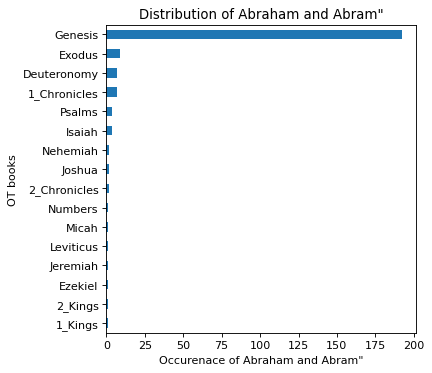

In [19]:
figure(num=None, figsize=(5, 5), dpi=80, facecolor='w', edgecolor='k')
BHSAbrahamSearch.groupby("S1").size().sort_values(ascending=True).plot.barh()
plt.xlabel('Occurenace of Abraham and Abram"')
plt.ylabel('OT books')
plt.title('Distribution of Abraham and Abram"')
plt.show()

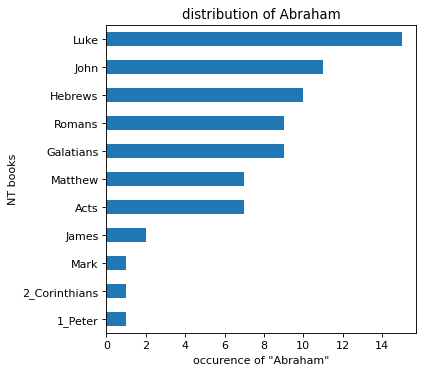

In [52]:
figure(num=None, figsize=(5, 5), dpi=80, facecolor='w', edgecolor='k')
NTAbrahamSearchLex.groupby("S1").size().sort_values(ascending=True).plot.barh()
plt.xlabel('occurence of "Abraham"')
plt.ylabel('NT books')
plt.title('distribution of Abraham')
plt.show()

## Simple Scatter-Plotting

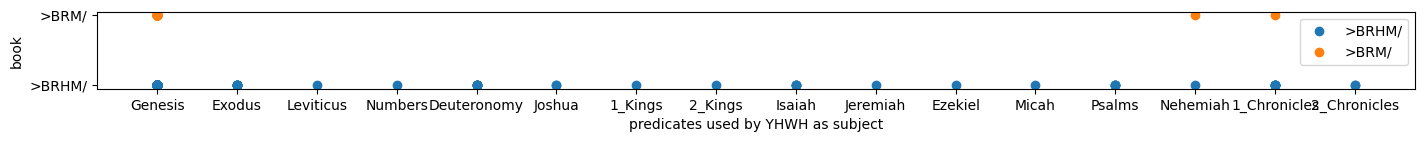

In [20]:
fig, ax = plt.subplots()
fig.set_size_inches(17, 1)

for S1, df in BHSAbrahamSearch.groupby('lex1'):
    ax.scatter(x="S1", y="lex1", data=df, label=S1)

ax.set_xlabel("predicates used by YHWH as subject")
ax.set_ylabel("book")
ax.legend();

## Simple ImPlotting with Seaborn

Text(0.5, 28.999999999999986, 'OT books')

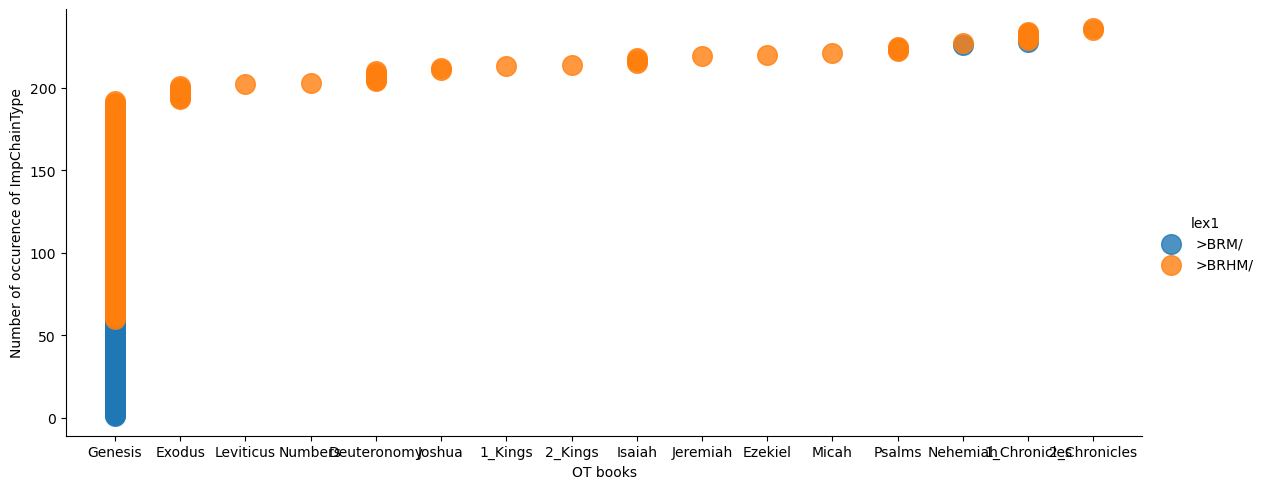

In [54]:
sns.lmplot(x="S1", y="R", data=BHSAbrahamSearch, hue='lex1', height=5, aspect=7/3, fit_reg=False, scatter_kws={"s": 200})
ax = plt.gca()
ax.set_ylabel('Number of occurence of ImpChainType')
ax.set_xlabel('OT books')

Text(0.5, 28.999999999999986, 'OT books')

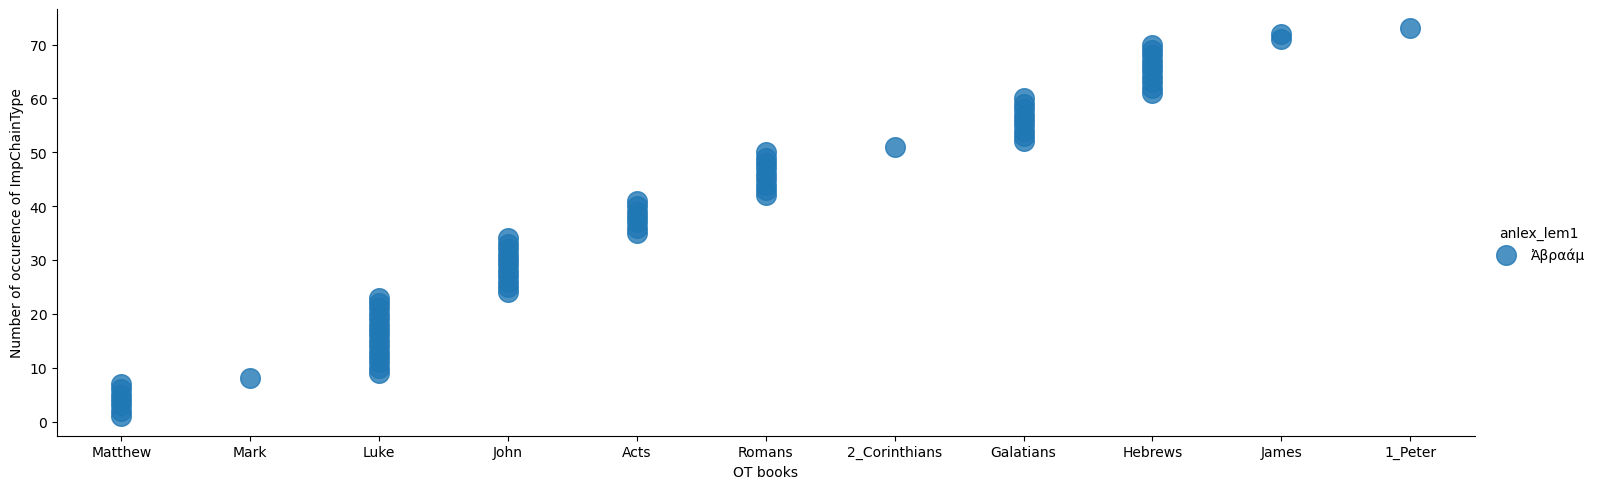

In [55]:
sns.lmplot(x="S1", y="R", data=NTAbrahamSearchLex, hue='anlex_lem1', height=5, aspect=9/3, fit_reg=False, scatter_kws={"s": 200})
ax = plt.gca()
ax.set_ylabel('Number of occurence of ImpChainType')
ax.set_xlabel('OT books')

## Simple Pie-Plotting

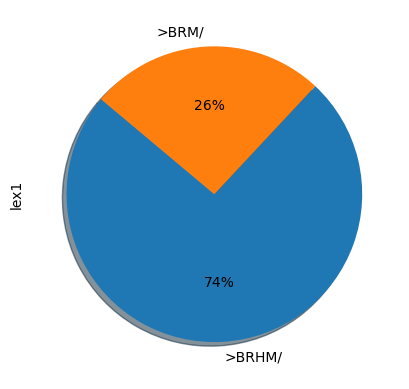

In [56]:
BHSAbrahamSearch.lex1.value_counts(sort=False).plot.pie(autopct='%1.0f%%', shadow=True, startangle=140)
plt.show()

# Assignments
1. Think of two words that you would like to search in both the BHS and the NT(Tischendorf). For example יהוה/κύριος and אֱלֹהִים/θεός. Since you do not yet know how to write your word in a TF accaptable way you can simple look up the book/chapter/verse where they appear. In BHS this would look like:

```
book book=yourbook
 chapter chapter=yourchapter
  verse verse=yourverse
   word lex
```

For Tischendorf this would look like:
```
book book=yourbook
 chapter chapter=yourchapter
  verse verse=yourverse
   word lex_og
```
In both cases run the `show` command instead of the `table` command. This will enable you to copy paste the correct writing into your word search query.

2. Search for your words in both the BHS and the NT.
3. In which book does that word appear most often (BHS and NT)?
4. Make a simple plot of your choice to represent your query result.

# Whats Next?: Complex Query building
1. We will learn how to build VocabLists for Hebrew and Greek courses that you have to teach in the future.
2. We will us the remaining time to get issues and questions resolved.